In [612]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import datetime as dt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [613]:
data=pd.read_csv('/kaggle/input/health-dataset/healthcare_dataset.csv')

In [614]:
data.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal


In [615]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

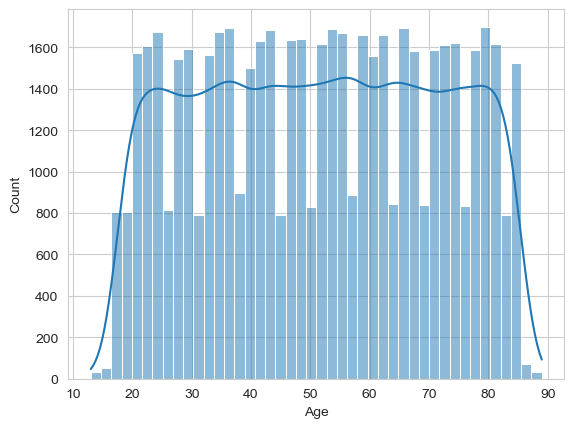

In [616]:
sns.histplot(x='Age',data=data,kde=True)
plt.show()

In [617]:
data['Age'].skew()

-0.005735270674183171

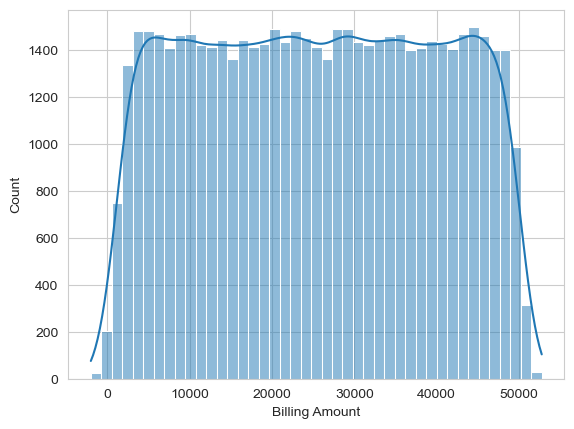

In [618]:
sns.histplot(x='Billing Amount',data=data,kde=True)
plt.show()

In [619]:
#Feature Engineering
#Converting date to Day,Month and Year
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'],errors='coerce')
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'],errors='coerce')


In [620]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [621]:
data['No of days in Hospital']=data['Discharge Date']-data['Date of Admission']

In [622]:
data.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,No of days in Hospital
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2 days


In [623]:
data['No of days in Hospital']=data['No of days in Hospital'].astype('str')


In [624]:
data['No of days in Hospital']=data['No of days in Hospital'].apply(lambda x :x.split(' ',)[0])



In [625]:
data.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,No of days in Hospital
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2


In [626]:
data['No of days in Hospital']=data['No of days in Hospital'].astype(int)

In [627]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Name                    55500 non-null  object        
 1   Age                     55500 non-null  int64         
 2   Gender                  55500 non-null  object        
 3   Blood Type              55500 non-null  object        
 4   Medical Condition       55500 non-null  object        
 5   Date of Admission       55500 non-null  datetime64[ns]
 6   Doctor                  55500 non-null  object        
 7   Hospital                55500 non-null  object        
 8   Insurance Provider      55500 non-null  object        
 9   Billing Amount          55500 non-null  float64       
 10  Room Number             55500 non-null  int64         
 11  Admission Type          55500 non-null  object        
 12  Discharge Date          55500 non-null  dateti

In [628]:
data['Hospital'].value_counts()

Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: count, Length: 39876, dtype: int64

In [629]:
data.isna().sum()

Name                      0
Age                       0
Gender                    0
Blood Type                0
Medical Condition         0
Date of Admission         0
Doctor                    0
Hospital                  0
Insurance Provider        0
Billing Amount            0
Room Number               0
Admission Type            0
Discharge Date            0
Medication                0
Test Results              0
No of days in Hospital    0
dtype: int64

In [630]:
cols_to_drop=['Name','Date of Admission','Discharge Date','Room Number','Doctor','Hospital']
data.drop(columns=cols_to_drop,axis=1,inplace=True)

In [631]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,No of days in Hospital
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,2
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal,15
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal,20


In [632]:
data['Medication'].value_counts()

Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64

In [633]:
data[data['Billing Amount'] < 0]

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,No of days in Hospital
132,32,Female,AB-,Cancer,Aetna,-502.507813,Urgent,Penicillin,Normal,18
799,49,Female,AB-,Asthma,Aetna,-1018.245371,Elective,Penicillin,Inconclusive,21
1018,60,Male,A+,Hypertension,Aetna,-306.364925,Elective,Ibuprofen,Normal,21
1421,74,Female,O+,Asthma,Blue Cross,-109.097122,Emergency,Ibuprofen,Abnormal,20
2103,72,Female,B-,Diabetes,Blue Cross,-576.727907,Urgent,Aspirin,Abnormal,27
...,...,...,...,...,...,...,...,...,...,...
52894,23,Male,AB-,Diabetes,Blue Cross,-353.865186,Elective,Lipitor,Inconclusive,12
53204,55,Male,A+,Hypertension,Aetna,-306.364925,Elective,Ibuprofen,Normal,21
53232,68,Female,B+,Hypertension,Aetna,-591.917419,Elective,Lipitor,Abnormal,2
54136,64,Male,O+,Cancer,UnitedHealthcare,-199.663795,Urgent,Ibuprofen,Abnormal,12


In [634]:
data=data[data['Billing Amount'] >= 0]

In [635]:
data[data['Billing Amount'] < 0]

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,No of days in Hospital


In [636]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,No of days in Hospital
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,2
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal,15
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal,20


In [637]:
new_cols=['Age','Gender','Blood Type','Medical Condition','Insurance Provider','Admission Type','Medication','Test Results','No of days in Hospital','Billing Amount']
data=data[new_cols]

In [638]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results,No of days in Hospital,Billing Amount
0,30,Male,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal,2,18856.281306
1,62,Male,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive,6,33643.327287
2,76,Female,A-,Obesity,Aetna,Emergency,Aspirin,Normal,15,27955.096079
3,28,Female,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal,30,37909.782410
4,43,Female,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal,20,14238.317814


In [639]:
numerical_col_X='Age'
numerical_col_Y='Billing Amount'
categorical_col=data.select_dtypes(include=['object']).columns
print(categorical_col)

Index(['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
       'Admission Type', 'Medication', 'Test Results'],
      dtype='object')


In [640]:
X=data.drop(columns='Billing Amount',axis=1)
y=data['Billing Amount']

In [641]:
from sklearn.model_selection import train_test_split

In [642]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [643]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(44313, 9) (11079, 9) (44313,) (11079,)


In [644]:
enc=LabelEncoder()
X_train[categorical_col]=X_train[categorical_col].apply(enc.fit_transform)
X_test[categorical_col]=X_test[categorical_col].apply(enc.fit_transform)

In [645]:
y_train=np.log1p(y_train)
y_test=np.log1p(y_test)

In [646]:
from tensorflow import keras


In [647]:
model = keras.Sequential()
model.add(keras.Input(shape=(9,))),
model.add(keras.layers.Dense(64,activation="relu")),
model.add(keras.layers.Dropout(0.2)),
model.add(keras.layers.Dense(32, activation="relu")),
model.add(keras.layers.Dropout(0.2)),
model.add(keras.layers.Dense(1))




In [648]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [649]:
model.compile(optimizer='rmsprop',loss='mean_squared_error')

In [650]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=512)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 53.6210 - val_loss: 10.3601
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.3504 - val_loss: 7.9708
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7024 - val_loss: 5.5117
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4690 - val_loss: 3.1587
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8733 - val_loss: 3.4021
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2872 - val_loss: 2.5240
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8581 - val_loss: 3.1753
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4842 - val_loss: 1.9344
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1912 - val_loss: 2.2049
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8279 - val_loss: 1.6058
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6349 - val_loss: 1.5250
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3758 - val

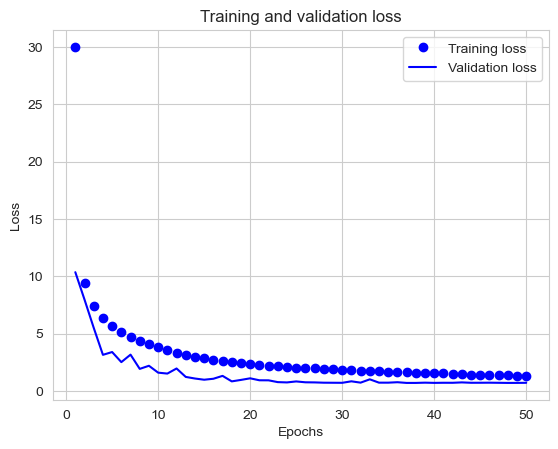

In [653]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [656]:
y_pred=model.predict(X_test)

347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [657]:
y_pred[0]

array([9.788611], dtype=float32)